In [1]:
import pandas as pd
import numpy as np

In [19]:
df_prices = pd.read_pickle('../data/data_spx_raw.pkl')
df_prices.query("ric != 'GOOGL.O'", inplace = True)

In [20]:
df_prices.loc[:, 'market_cap_rank'] = df_prices.groupby("date")['market_cap'].rank(ascending = False, pct = False)

In [21]:
df_day = df_prices.query("date == '2015-12-31' & market_cap_rank < 10")

In [22]:
df_latex = df_day[['ric', 'market_cap']].eval("market_cap = market_cap/1e9").sort_values('market_cap', ascending = False)

In [23]:
df_latex.loc[:, 'Stock'] = df_latex['ric'].str.split('.', expand = True).iloc[:, 0]
df_latex.loc[:, 'Market Capitalization (bi USD)'] = df_latex['market_cap'].astype(int)

In [24]:
print(df_latex[['Stock', 'Market Capitalization (bi USD)']].to_latex(index = False))

\begin{tabular}{lr}
\toprule
Stock &  Market Capitalization (bi USD) \\
\midrule
 AAPL &                             583 \\
 GOOG &                             528 \\
 MSFT &                             443 \\
 BRKb &                             325 \\
  XOM &                             324 \\
 AMZN &                             316 \\
   GE &                             314 \\
   FB &                             295 \\
  JNJ &                             284 \\
\bottomrule
\end{tabular}



In [25]:
list_assets = df_day['asset_identifier'].to_list()

In [26]:
df_prices.query("asset_identifier.isin(@list_assets)", inplace = True)

<AxesSubplot:xlabel='date'>

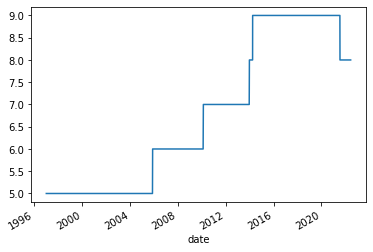

In [27]:
df_prices.groupby('date')['asset_identifier'].count().plot()

In [28]:
df_prices = df_prices[['asset_identifier', 'date', 'close']].sort_values(["asset_identifier", 'date']).reset_index(drop = True)

In [29]:
df_prices.to_pickle(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code_refactory\data\data_10\data_spx_10.pkl")